Predicting the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors

we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

In [2]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 31920    0 31920    0     0   6384      0 --:--:--  0:00:05 --:--:--  6285
100  143k    0  143k    0     0  29319      0 --:--:--  0:00:05 --:--:-- 34755
100  367k    0  367k    0     0  62655      0 --:--:--  0:00:06 --:--:-- 73352
100  575k    0  575k    0     0  84128      0 --:--:--  0:00:07 --:--:--  118k
100  847k    0  847k    0     0  96375      0 --:--:--  0:00:09 --:--:--  181k
100 1087k    0 1087k    0     0   120k      0 --:--

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [12]:
weather = pd.read_csv('BicycleWeather.csv',index_col='DATE', parse_dates=True)
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,FMTM,PGTM,PRCP,SNOW,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.4444,-122.3138,112.8,10.51,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.4444,-122.3138,112.8,10.07,NaN,NaN,0.43,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.4444,-122.3138,112.8,5.14,NaN,NaN,0.03,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.4444,-122.3138,112.8,10.51,NaN,NaN,0.80,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.4444,-122.3138,112.8,13.65,NaN,NaN,0.05,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


#### total daily bicycle traffic

In [16]:
daily = counts.resample('d').sum()
daily = daily[['Fremont Bridge Total']]
daily

,Fremont Bridge Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2021-03-27,2598.0
2021-03-28,389.0
2021-03-29,1868.0


#### the patterns of use generally vary from day to day

In [18]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [19]:
daily

,Fremont Bridge Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-03-27,2598.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-03-28,389.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-03-29,1868.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### expect riders to behave differently on holidays

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')

In [21]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily

,Fremont Bridge Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
2021-03-27,2598.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2021-03-28,389.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2021-03-29,1868.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [22]:
daily['holiday'].fillna(0, inplace=True)
daily

,Fremont Bridge Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-27,2598.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2021-03-28,389.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2021-03-29,1868.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### hours of daylight would affect how many people ride

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(8, 17)

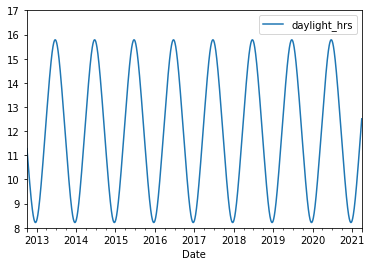

In [23]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

#### add the average temperature and total precipitation to the data

In [26]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [27]:
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [28]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

#### add a counter that increases from day 1, and measures how many years have passed. This will let us measure any observed annual increase or decrease in daily crossings

In [30]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [31]:
daily.head()

,Fremont Bridge Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1,0.010959


#### We will set fit_intercept = False, because the daily flags essentially operate as their own day-specific intercepts

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Fremont Bridge Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

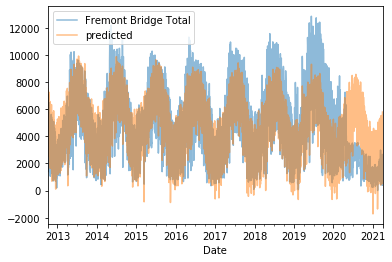

In [38]:
daily[['Fremont Bridge Total', 'predicted']].plot(alpha=0.5);

In [39]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon               -596.085682
Tue               -258.869312
Wed               -294.902971
Thu               -539.785796
Fri              -1110.720063
Sat              -3519.414055
Sun              -3677.975999
holiday          -2452.298755
daylight_hrs       191.378019
PRCP           -334012.517403
dry day            979.892773
Temp (C)           833.668600
annual            -156.520288
dtype: float64

In [40]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [41]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                effect    error
Mon             -596.0    191.0
Tue             -259.0    196.0
Wed             -295.0    191.0
Thu             -540.0    189.0
Fri            -1111.0    193.0
Sat            -3519.0    193.0
Sun            -3678.0    195.0
holiday        -2452.0    286.0
daylight_hrs     191.0     19.0
PRCP         -334013.0  27789.0
dry day          980.0     72.0
Temp (C)         834.0     47.0
annual          -157.0     15.0
